# GNP scattering in water

In [69]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

## load water and gold bulk refractive index

In [82]:
url = "https://refractiveindex.info/data_csv.php?datafile=data/main/Au/Rakic-BB.yml"
df1 = pd.read_csv(url)

#reorganize data
#original data with n and k in the same columne
index1=df1.index[df1.n=='k'].tolist()[0]
df2=df1[:index1].astype(float)
df2['k']=df1[index1+1:].n.values.astype('float')
df1=df2

#if data are downloaded and stored in local file
#df1=pd.read_csv('./Rakic-BB.csv')
#df1=df1.drop(columns=['wl.1'])
#df1.columns=["Wavelength", "n", "k"]

#change column name and use only wavelength less than 800nm
df1.columns=["Wavelength", "n", "k"]
df1.Wavelength=df1.Wavelength*1000
df1Au=df1[(df1['Wavelength']<800) & (df1['Wavelength']>300)]
df1Au.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 12 to 72
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Wavelength  61 non-null     float64
 1   n           61 non-null     float64
 2   k           61 non-null     float64
dtypes: float64(3)
memory usage: 1.9 KB


In [105]:
df1Au

,Wavelength,n,k
12,301.09,1.73220,1.8700
13,306.00,1.73870,1.8512
14,310.99,1.74110,1.8319
15,316.06,1.73910,1.8128
16,321.21,1.73270,1.7946
...,...,...,...
68,744.88,0.17313,4.2629
69,757.02,0.17577,4.3625
70,769.37,0.17895,4.4624
71,781.91,0.18262,4.5627


In [83]:
url = "https://refractiveindex.info/data_csv.php?datafile=data/main/H2O/Hale.yml"
df1 = pd.read_csv(url)

#reorganize data
#original data with n and k in the same columne
index1=df1.index[df1.n=='k'].tolist()[0]
df2=df1[:index1].astype(float)
df2['k']=df1[index1+1:].n.values.astype('float')
df1=df2

#if data are downloaded and stored in local file
#df1=pd.read_csv('./Rakic-BB.csv')
#df1=df1.drop(columns=['wl.1'])
#df1.columns=["Wavelength", "n", "k"]

#change column name and use only wavelength less than 800nm
df1.columns=["Wavelength", "n", "k"]
df1.Wavelength=df1.Wavelength*1000
df1H2o=df1[(df1['Wavelength']<800) & (df1['Wavelength']>300)]
df1H2o.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 5 to 23
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Wavelength  19 non-null     float64
 1   n           19 non-null     float64
 2   k           19 non-null     float64
dtypes: float64(3)
memory usage: 608.0 bytes


In [104]:
df1H2o

,Wavelength,n,k
5,325.0,1.346,1.080000e-08
6,350.0,1.343,6.500000e-09
7,375.0,1.341,3.500000e-09
8,400.0,1.339,1.860000e-09
9,425.0,1.338,1.300000e-09
10,450.0,1.337,1.020000e-09
11,475.0,1.336,9.350000e-10
12,500.0,1.335,1.000000e-09
13,525.0,1.334,1.320000e-09
14,550.0,1.333,1.960000e-09


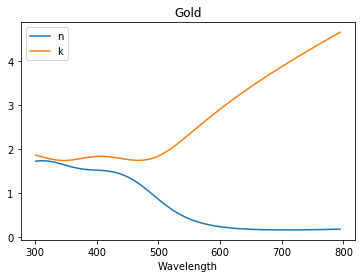

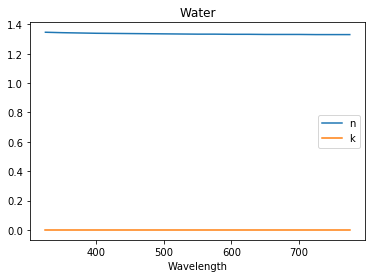

In [106]:
df1Au.plot(x='Wavelength', y=['n','k'],logy=False,title='Gold')
#df1.plot(subplots=True);
df1H2o.plot(x='Wavelength', y=['n','k'],logy=False,title='Water')

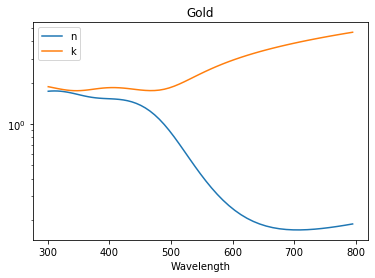

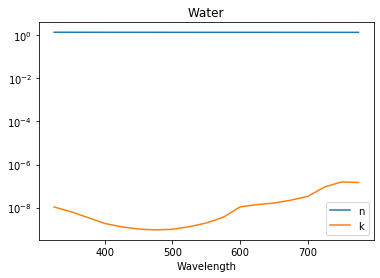

In [89]:
df1Au.plot(x='Wavelength', y=['n','k'],logy=True,title='Gold')
#df1.plot(subplots=True);
df1H2o.plot(x='Wavelength', y=['n','k'],logy=True,title='Water')

We can neglect the water absorption

## Put GNP in water

In [90]:
#use the more regular grids of wavelength created in t01.ipynb
import pickle
#read data of wavelength, n, k, x1, xn, xd
[nv2, kv2, wv2, dv2, nkd]=pickle.load(open("../data/gold_nk.pkl", "rb" ))
nkd.shape

(50, 6)

In [ ]:
nw=1.33+0j

Text(0.5, 0, 'Wavelength')

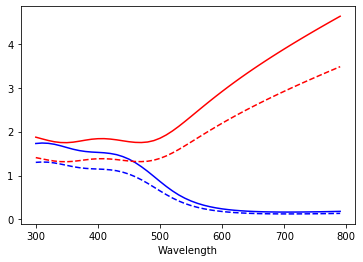

In [91]:
plt.plot(wv2,nv2,'b')
plt.plot(wv2,kv2,'r')

plt.plot(wv2,nv2/nw,'b--')
plt.plot(wv2,kv2/nw,'r--')
plt.xlabel("Wavelength")

plt.xlabel("Wavelength")

## Compute scattering results

In [97]:
import PyMieScatt as ps
def run_mie(nv, kv, wv, dv):
    nd=len(dv)
    nwv=len(wv)
    
    #run the mie code for above parameters
    miev=np.array([[ps.MieQ(nv[i]+kv[i]*1.0j,wv[i],dv[j],asDict=True) \
                    for j in range(nd)] \
                   for i in range(nwv)])

    qextv=np.array([[miev[i,j]['Qext'] for j in range(nd)]for i in range(nwv)])
    qscav=np.array([[miev[i,j]['Qsca'] for j in range(nd)]for i in range(nwv)])
    qabsv=np.array([[miev[i,j]['Qabs'] for j in range(nd)]for i in range(nwv)])
    qbackv=np.array([[miev[i,j]['Qback'] for j in range(nd)]for i in range(nwv)])
    gv=np.array([[miev[i,j]['g'] for j in range(nd)]for i in range(nwv)])

    return [qextv,qscav,qscav/qextv,qabsv, qbackv,gv]

    
def plot_q(fig, datav, ylabelv, wv, dv,labelv='',linetype='-',yscale='linear'):


    nd=len(dv)
    nwv=len(wv)
    num_plots=len(dv)

    colormap = plt.cm.gist_ncar

    for i in range(6):
        ax=plt.subplot(2,3,i+1)
        plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, num_plots))))

        ax.set_yscale(yscale)
        for j in range(nd):
            tmp=plt.plot(wv,datav[i][:,j], linetype, label=labelv)

        plt.xlabel("Wavelength(nm)")
        plt.ylabel(ylabelv[i])
        if(i==5):
            plt.legend(bbox_to_anchor=(1.3,1.2),title="Medium")
    plt.tight_layout()

In [93]:
dv=[40]
wv=wv2
figsize=(9,6)
ylabelv=["$Q_{ext}$","$Q_{sca}$","$SSA$","$Q_{abs}$","$Q_{back}$","Asymmetry factor"]

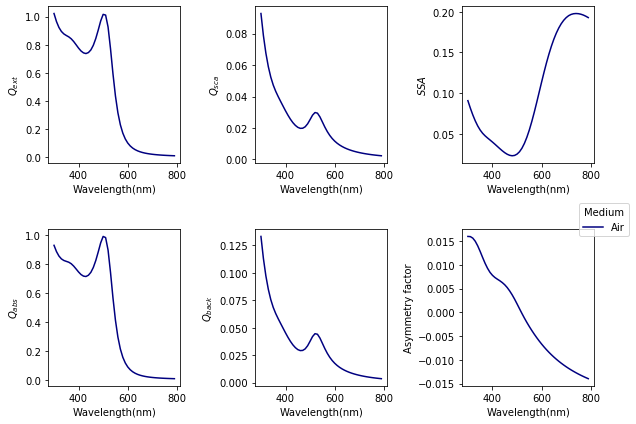

In [99]:
nv=nv2
kv=kv2
datav1=run_mie(nv, kv, wv, dv)

fileout='/Users/mgao1/Desktop/gold_nanoparticle_medium_air.pdf'
fig=plt.figure(figsize=figsize)
plot_q(fig, datav1, ylabelv, wv, dv,labelv='Air')

[40]


/anaconda3/envs/rt/lib/python3.7/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


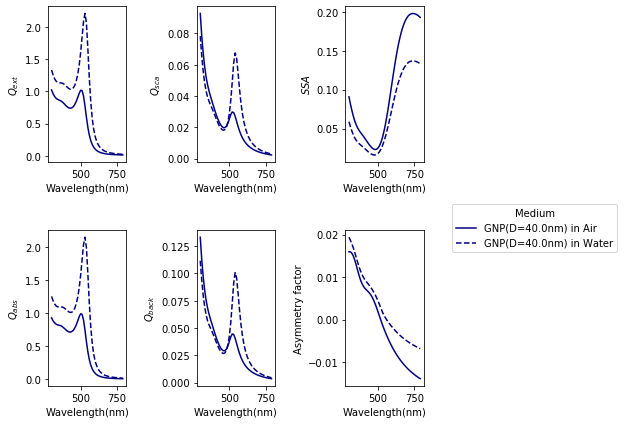

In [110]:
nv=nv2/1.33
kv=kv2/1.33
datav2=run_mie(nv, kv, wv, dv)
print(dv)
fileout='../img/t08_GNP_in_water.pdf'
fig=plt.figure(figsize=figsize)
plot_q(fig, datav1, ylabelv, wv, dv,linetype='-',labelv='GNP(D=%3.1fnm) in Air'% dv[0])
plot_q(fig, datav2, ylabelv, wv, dv,linetype='--',labelv='GNP(D=%3.1fnm) in Water' %dv[0])
plt.savefig(fileout, dpi=300)
#plt.title("GNP diamter %3.3f" %dv[0])

In [109]:
ls ../img

legend.png
t01_Haiss2007_Fig4a.png
t01_Haiss_figures.png
t01_PyMieScatt_Q.png
t01_gold_nanoparticle.pdf
t02_Diff-Mie-MSTM.png
t03_two_sphere_center_distance2r.png
t03_two_sphere_center_distance2r_log.png
t03_two_sphere_center_distance4r.png
t03_two_sphere_center_distance4r_log.png
t04_GNP+GNP.png
t04_GNP+Protein.png
t04_Qext_GNPvsProtein.png
t04_geometry.png
t06_coated_g.png
t06_coated_g2.png
t06_coated_qabs.png
t06_coated_qabs2.png
t06_coated_qext.png
t06_coated_qext2.png
t06_coated_qsca.png
t06_coated_qsca2.png
t07_gv_spheres.png
t07_p11.png
t07_p21.png
t07_p4.png
t07_p51.png
t07_qabs_spheres.png
t07_qext_coated.png
t07_qext_spheres.png
t07_qsca_spheres.png
t08_gold_nanoparticle_medium_water.pdf


## Phase function

## Colorimetry

## Discussion

How the scattering properties created pink color of the GNP solutions?